# How to Reverse Normalization for YOLO Annotations

The goal of this process is to take **normalized YOLO-style annotations**, where the coordinates provided in the `.txt` file are normalized relative to the image size, and reverse them back to the **original image coordinates**. This is important when you want to visualize the bounding boxes on the actual images.

## YOLO Annotation Format
In YOLO, each annotation for an object is typically represented as follows in the `.txt` file: <br>

* <class> <normalized_x_center> <normalized_y_center> <normalized_width> <normalized_height>
  Where:
- **class**: The integer representing the object class.
- **normalized_x_center**: The normalized x-coordinate of the center of the bounding box (relative to the image's width).
- **normalized_y_center**: The normalized y-coordinate of the center of the bounding box (relative to the image's height).
- **normalized_width**: The normalized width of the bounding box (relative to the image's width).
- **normalized_height**: The normalized height of the bounding box (relative to the image's height).

The normalized values for **x_center**, **y_center**, **width**, and **height** range between 0 and 1, relative to the dimensions of the image (width and height).

## Steps to Reverse the Normalization and Draw Bounding Boxes

### 1. Reverse Normalization
The first step is to convert the normalized values back into pixel values relative to the image's actual dimensions. Here’s how you can do it:

- The **center coordinates** are normalized with respect to the image width and height. We reverse the normalization as follows:

  - `x_center = normalized_x_center * image_width`
  - `y_center = normalized_y_center * image_height`

- Similarly, we reverse the **width** and **height** normalization:

  - `box_width = normalized_width * image_width`
  - `box_height = normalized_height * image_height`

### 2. Convert to Top-Left Corner Coordinates
To plot the bounding box on the image, we need the **top-left corner** (x, y) of the bounding box. This can be derived from the center coordinates using the following formulas:

- `top_left_x = x_center - (box_width / 2)`
- `top_left_y = y_center - (box_height / 2)`

### 3. Draw the Bounding Box
Now that we have the **top-left corner** and **box dimensions** (width and height), we can draw the bounding box on the image. This can be done using Matplotlib or OpenCV to visualize the object detection.

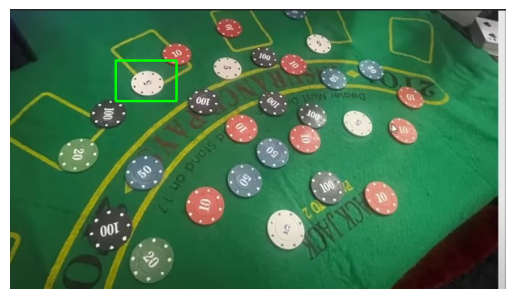

In [1]:
import cv2
import matplotlib.pyplot as plt

# Your YOLO-style annotation (example values)
normalized_x_center = 0.274510
normalized_y_center = 0.256522
normalized_width = 0.124183
normalized_height = 0.147826

# Image dimensions
image_height = 345  # Height of the image (number of rows)
image_width = 612   # Width of the image (number of columns)

# Reverse the normalization process
x_center = normalized_x_center * image_width
y_center = normalized_y_center * image_height
box_width = normalized_width * image_width
box_height = normalized_height * image_height

# Calculate the top-left corner of the bounding box
top_left_x = int(x_center - (box_width / 2))
top_left_y = int(y_center - (box_height / 2))

# Load the image (replace 'image_one.jpg' with the actual image path)
image = cv2.imread('image_one.jpg', 1)

# Ensure the image is loaded properly
if image is None:
    print("Error: Image not loaded. Check the image path.")
else:
    # Draw the rectangle (bounding box)
    bottom_right_x = top_left_x + int(box_width)
    bottom_right_y = top_left_y + int(box_height)
    
    # Draw the rectangle on the image (BGR format, color is green (0, 255, 0))
    image = cv2.rectangle(image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 2)

    # Convert from BGR to RGB for correct display in Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with Matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis for a cleaner view
    plt.show()


### Now lets read in the .txt and  draw bounding box for multiple objects 


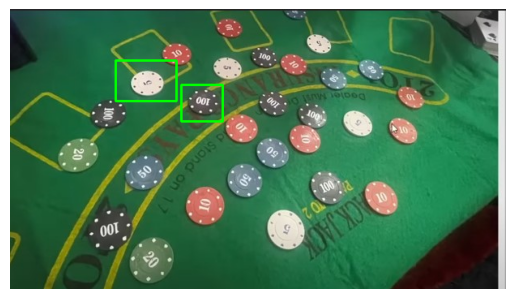

In [2]:

import cv2
import matplotlib.pyplot as plt
import csv

# Open the file with YOLO annotations
with open("image_one.txt", "r") as fs:
    fs = csv.reader(fs, delimiter=" ")
    test_file = list(fs)

# Read the image
image = cv2.imread('image_one.jpg', 1)
image_height, image_width, _ = image.shape

# Loop over each row in the annotation file
for row in test_file:
    # Parse the YOLO-style annotation
    class_id = int(row[0])  # Class ID (you can use this for debugging or filtering)
    normalized_x_center = float(row[1])  # Normalized x center
    normalized_y_center = float(row[2])  # Normalized y center
    normalized_width = float(row[3])  # Normalized width
    normalized_height = float(row[4])  # Normalized height

    # Reverse normalization to get pixel values
    x_center = normalized_x_center * image_width
    y_center = normalized_y_center * image_height
    box_width = normalized_width * image_width
    box_height = normalized_height * image_height

    # Convert center coordinates to top-left corner coordinates
    top_left_x = int(x_center - (box_width / 2))
    top_left_y = int(y_center - (box_height / 2))

    # Calculate bottom-right corner coordinates
    bottom_right_x = top_left_x + int(box_width)
    bottom_right_y = top_left_y + int(box_height)

    # Draw the bounding box on the image (Green color, thickness 2)
    image = cv2.rectangle(image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 2)

# Convert BGR image to RGB for displaying in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the final image with all bounding boxes using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis for a cleaner view
plt.show()


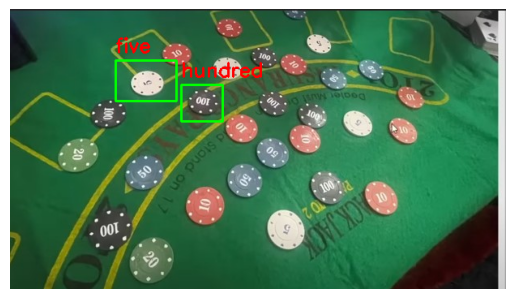

In [4]:
import cv2
import matplotlib.pyplot as plt
import csv

# Define class labels
class_labels = {
    0: "five",
    1: "ten",
    2: "twenty",
    3: "fifty",
    4: "hundred"
}

# Open the file with YOLO annotations
with open("image_one.txt", "r") as fs:
    fs = csv.reader(fs, delimiter=" ")
    test_file = list(fs)

# Read the image
image = cv2.imread('image_one.jpg', 1)
image_height, image_width, _ = image.shape

# Loop over each row in the annotation file
for row in test_file:
    # Parse the YOLO-style annotation
    class_id = int(row[0])  # Class ID (you can use this for debugging or filtering)
    normalized_x_center = float(row[1])  # Normalized x center
    normalized_y_center = float(row[2])  # Normalized y center
    normalized_width = float(row[3])  # Normalized width
    normalized_height = float(row[4])  # Normalized height

    # Reverse normalization to get pixel values
    x_center = normalized_x_center * image_width
    y_center = normalized_y_center * image_height
    box_width = normalized_width * image_width
    box_height = normalized_height * image_height

    # Convert center coordinates to top-left corner coordinates
    top_left_x = int(x_center - (box_width / 2))
    top_left_y = int(y_center - (box_height / 2))

    # Calculate bottom-right corner coordinates
    bottom_right_x = top_left_x + int(box_width)
    bottom_right_y = top_left_y + int(box_height)

    # Draw the bounding box on the image (Green color, thickness 2)
    image = cv2.rectangle(image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 2)

    # Get the class label
    label = class_labels.get(class_id, "Unknown")  # Default to "Unknown" if class_id is not in dictionary

    # Add the class label text above the bounding box
    cv2.putText(image, label, (top_left_x, top_left_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)

# Convert BGR image to RGB for displaying in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the final image with all bounding boxes using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis for a cleaner view
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
import csv

# Define class labels
class_labels = {
    0: "five",
    1: "ten",
    2: "twenty",
    3: "fifty",
    4: "hundred"
}

def draw_bounding_boxes(image_path, annotation_file_path):
    # Open the file with YOLO annotations
    with open(annotation_file_path, "r") as fs:
        fs = csv.reader(fs, delimiter=" ")
        annotations = list(fs)

    # Read the image
    image = cv2.imread(image_path, 1)
    image_height, image_width, _ = image.shape

    # Loop over each row in the annotation file
    for row in annotations:
        # Parse the YOLO-style annotation
        class_id = int(row[0])  # Class ID (you can use this for debugging or filtering)
        normalized_x_center = float(row[1])  # Normalized x center
        normalized_y_center = float(row[2])  # Normalized y center
        normalized_width = float(row[3])  # Normalized width
        normalized_height = float(row[4])  # Normalized height

        # Reverse normalization to get pixel values
        x_center = normalized_x_center * image_width
        y_center = normalized_y_center * image_height
        box_width = normalized_width * image_width
        box_height = normalized_height * image_height

        # Convert center coordinates to top-left corner coordinates
        top_left_x = int(x_center - (box_width / 2))
        top_left_y = int(y_center - (box_height / 2))

        # Calculate bottom-right corner coordinates
        bottom_right_x = top_left_x + int(box_width)
        bottom_right_y = top_left_y + int(box_height)

        # Draw the bounding box on the image (Green color, thickness 2)
        image = cv2.rectangle(image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 2)

        # Get the class label
        label = class_labels.get(class_id, "Unknown")  # Default to "Unknown" if class_id is not in dictionary

        # Add the class label text above the bounding box (Red text)
        cv2.putText(image, label, (top_left_x, top_left_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    # Convert BGR image to RGB for displaying in Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the final image with all bounding boxes using Matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis for a cleaner view
    plt.show()

# Example usage of the function
draw_bounding_boxes("image_one.jpg", "image_one.txt")


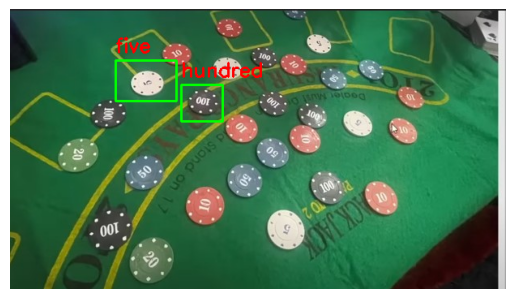

In [5]:
import cv2
import matplotlib.pyplot as plt
import csv

class My_object_detection:
    # Define class labels
    class_labels = {
        0: "five",
        1: "ten",
        2: "twenty",
        3: "fifty",
        4: "hundred"
    }

    def __init__(self, image_path, annotation_file_path):
        """
        Initializes the MyObjects class with an image and annotation file path.
        
        Parameters:
        - image_path (str): The file path to the image.
        - annotation_file_path (str): The file path to the YOLO annotation file.
        """
        self.image_path = image_path
        self.annotation_file_path = annotation_file_path
        self.image = cv2.imread(image_path, 1)
        self.image_height, self.image_width, _ = self.image.shape

    def draw_bounding_boxes(self):
        """
        This method processes the annotation file, draws bounding boxes,
        and labels on the image, then displays the image.
        """
        # Open the file with YOLO annotations
        with open(self.annotation_file_path, "r") as fs:
            fs = csv.reader(fs, delimiter=" ")
            annotations = list(fs)

        # Loop over each row in the annotation file
        for row in annotations:
            # Parse the YOLO-style annotation
            class_id = int(row[0])  # Class ID (you can use this for debugging or filtering)
            normalized_x_center = float(row[1])  # Normalized x center
            normalized_y_center = float(row[2])  # Normalized y center
            normalized_width = float(row[3])  # Normalized width
            normalized_height = float(row[4])  # Normalized height

            # Reverse normalization to get pixel values
            x_center = normalized_x_center * self.image_width
            y_center = normalized_y_center * self.image_height
            box_width = normalized_width * self.image_width
            box_height = normalized_height * self.image_height

            # Convert center coordinates to top-left corner coordinates
            top_left_x = int(x_center - (box_width / 2))
            top_left_y = int(y_center - (box_height / 2))

            # Calculate bottom-right corner coordinates
            bottom_right_x = top_left_x + int(box_width)
            bottom_right_y = top_left_y + int(box_height)

            # Draw the bounding box on the image (Green color, thickness 2)
            self.image = cv2.rectangle(self.image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 2)

            # Get the class label
            label = self.class_labels.get(class_id, "Unknown")  # Default to "Unknown" if class_id is not in dictionary

            # Add the class label text above the bounding box (Red text)
            cv2.putText(self.image, label, (top_left_x, top_left_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

        # Convert BGR image to RGB for displaying in Matplotlib
        image_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)

        # Display the final image with all bounding boxes using Matplotlib
        plt.imshow(image_rgb)
        plt.axis('off')  # Hide axis for a cleaner view
        plt.show()

# Example usage:
# Create an instance of the MyObjects class and draw bounding boxes
obj = My_object_detection("image_one.jpg", "image_one.txt")
obj.draw_bounding_boxes()
